In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import torch
import random
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
import EEGModels 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
warnings.filterwarnings('ignore')

Num GPUs Available:  3


In [29]:
data_path = './dataset'
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)
cross = 20

cuda:1


Begin to process person huangsiye_20210529_1.
Acc of train set: 0.90149
Acc of test set: 0.89828
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91416
Acc of test set: 0.91971
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.86712
Acc of test set: 0.88838
Begin to process person liangjie_20210424_2.
Acc of train set: 0.74177
Acc of test set: 0.74782
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75616
Acc of test set: 0.75212
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.82166
Acc of test set: 0.80232
Begin to process person tana_20210425_1.
Acc of train set: 0.92452
Acc of test set: 0.93146
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77332
Acc of test set: 0.76875
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.84057
Acc of test set: 0.82944
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80866
Acc of test set: 0.80804
Begin to process person zhengwen

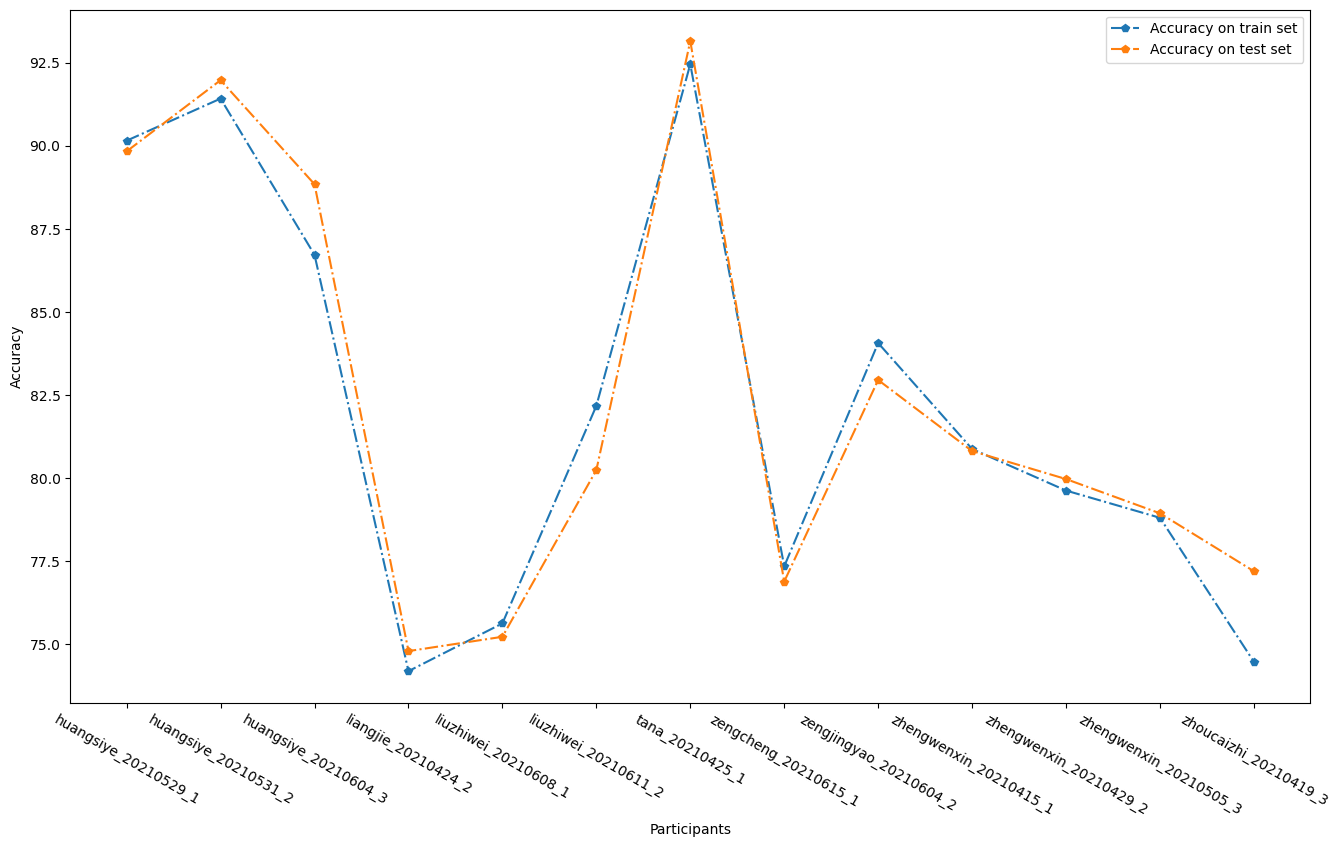

In [30]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_SVM = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = svm.SVC(C=1,kernel='rbf')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_SVM.append(acc_test*100)
    acc_trains.append(acc_train*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_SVM, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89330
Acc of test set: 0.89993
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91680
Acc of test set: 0.91009
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87327
Acc of test set: 0.87258
Begin to process person liangjie_20210424_2.
Acc of train set: 0.73265
Acc of test set: 0.74271
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75741
Acc of test set: 0.74779
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81888
Acc of test set: 0.81283
Begin to process person tana_20210425_1.
Acc of train set: 0.92581
Acc of test set: 0.92397
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.76942
Acc of test set: 0.77276
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83539
Acc of test set: 0.83425
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80666
Acc of test set: 0.80961
Begin to process person zhengwen

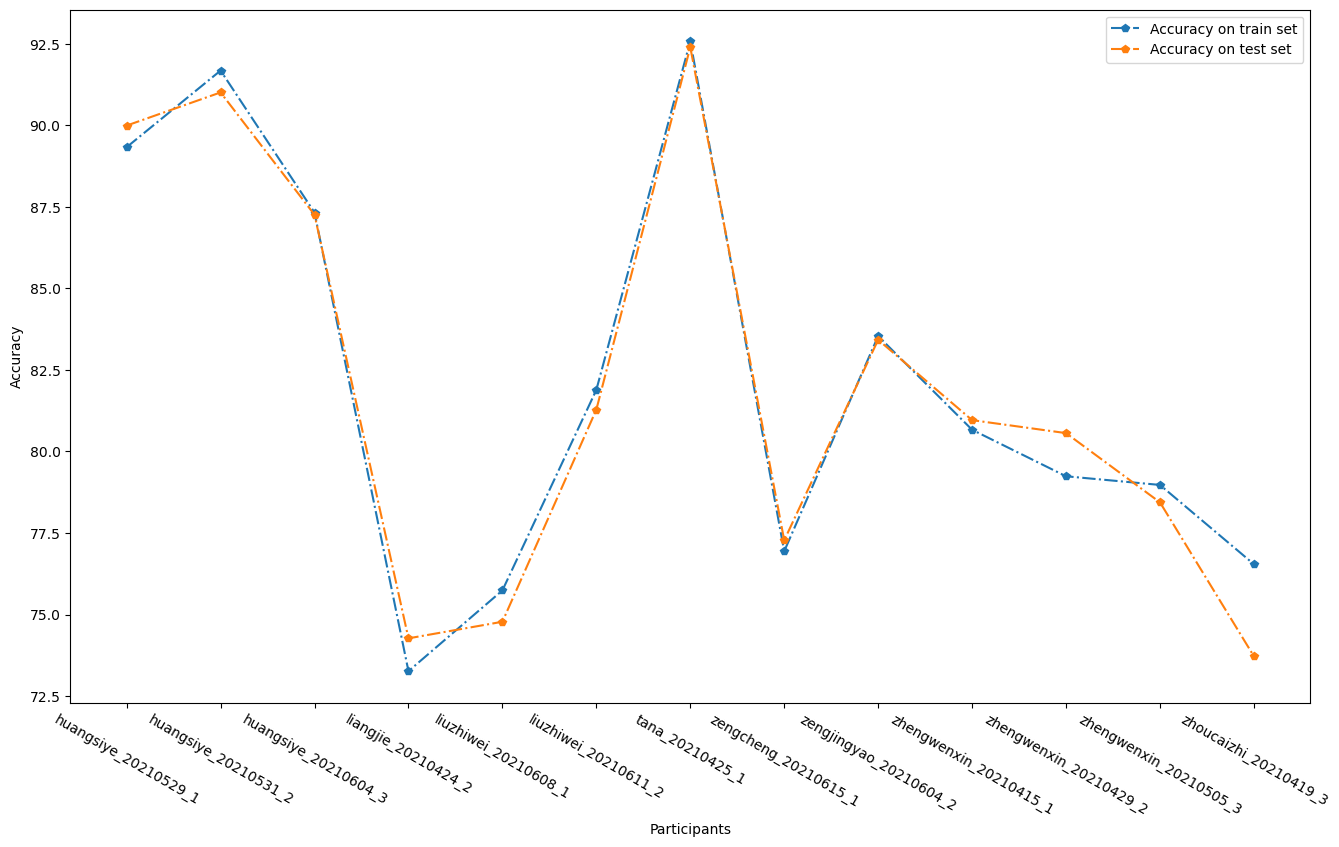

In [43]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_LR = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_LR.append(acc_test*100)
    acc_trains.append(acc_train*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.93250
Acc of test set: 0.87404
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.95479
Acc of test set: 0.85211
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.88092
Acc of test set: 0.86135
Begin to process person liangjie_20210424_2.
Acc of train set: 0.76979
Acc of test set: 0.72391
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.81710
Acc of test set: 0.72355
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.87407
Acc of test set: 0.75364
Begin to process person tana_20210425_1.
Acc of train set: 0.97170
Acc of test set: 0.87781
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.79777
Acc of test set: 0.77188
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.85589
Acc of test set: 0.80965
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.83339
Acc of test set: 0.77551
Begin to process person zhengwen

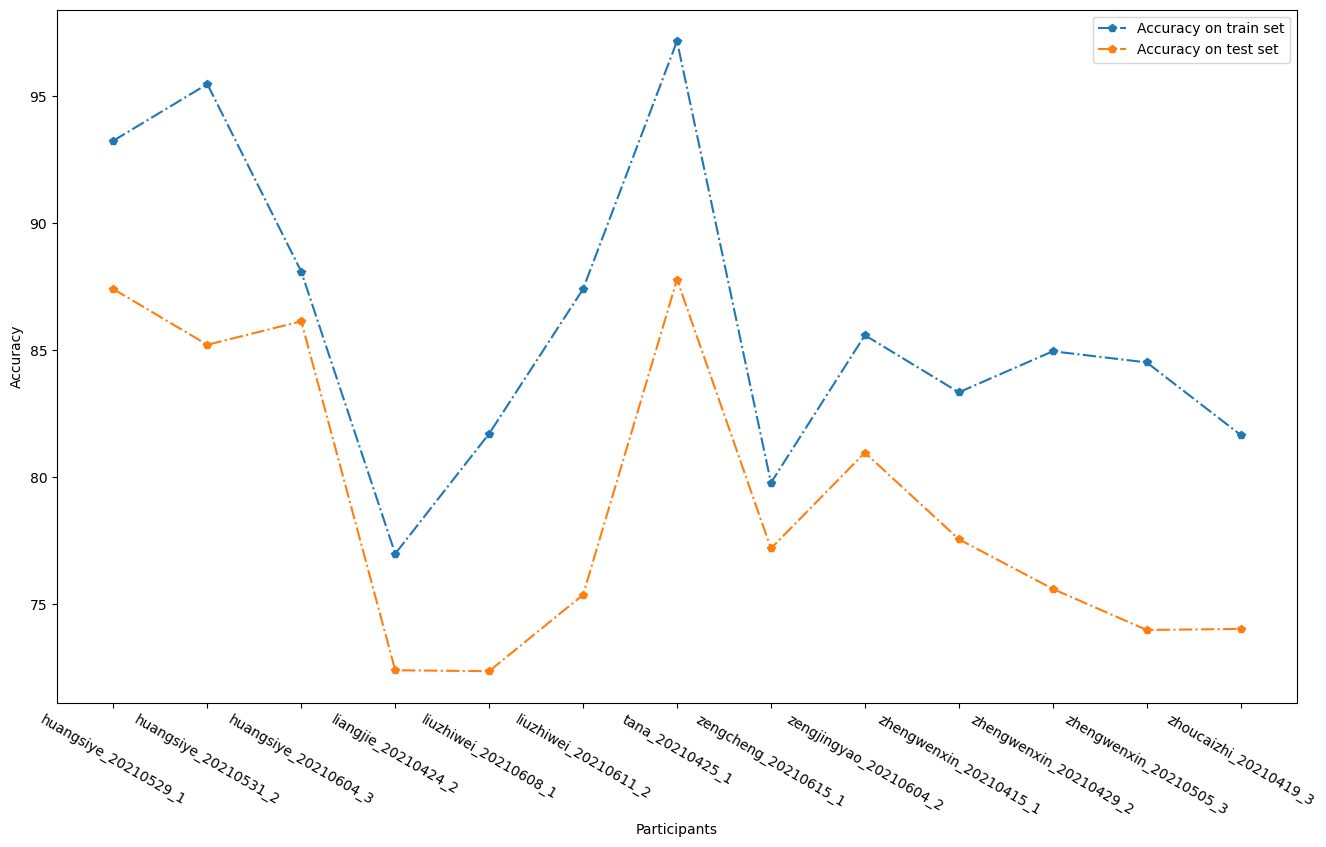

In [32]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_DTC = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = DecisionTreeClassifier(criterion = 'entropy')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_DTC.append(acc_test*100)
    acc_trains.append(acc_train*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [33]:
class MLP(nn.Module):
    def __init__(self, num_classes=2):
        super(MLP, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(310, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        x = self.classifier(x)
        return x

In [34]:
def Validation(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total * 100

Begin to process person huangsiye_20210529_1.
Acc of train set: 89.60532
Acc of test set: 89.42478
Begin to process person huangsiye_20210531_2.
Acc of train set: 91.64830
Acc of test set: 91.06799
Begin to process person huangsiye_20210604_3.
Acc of train set: 87.37020
Acc of test set: 87.11263
Begin to process person liangjie_20210424_2.
Acc of train set: 73.58781
Acc of test set: 73.20257
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 76.04622
Acc of test set: 74.59528
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 81.80316
Acc of test set: 81.29056
Begin to process person tana_20210425_1.
Acc of train set: 92.47426
Acc of test set: 92.76245
Begin to process person zengcheng_20210615_1.
Acc of train set: 77.05525
Acc of test set: 76.72570
Begin to process person zengjingyao_20210604_2.
Acc of train set: 83.23643
Acc of test set: 83.96046
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 80.91819
Acc of test set: 80.00863
Begin to pro

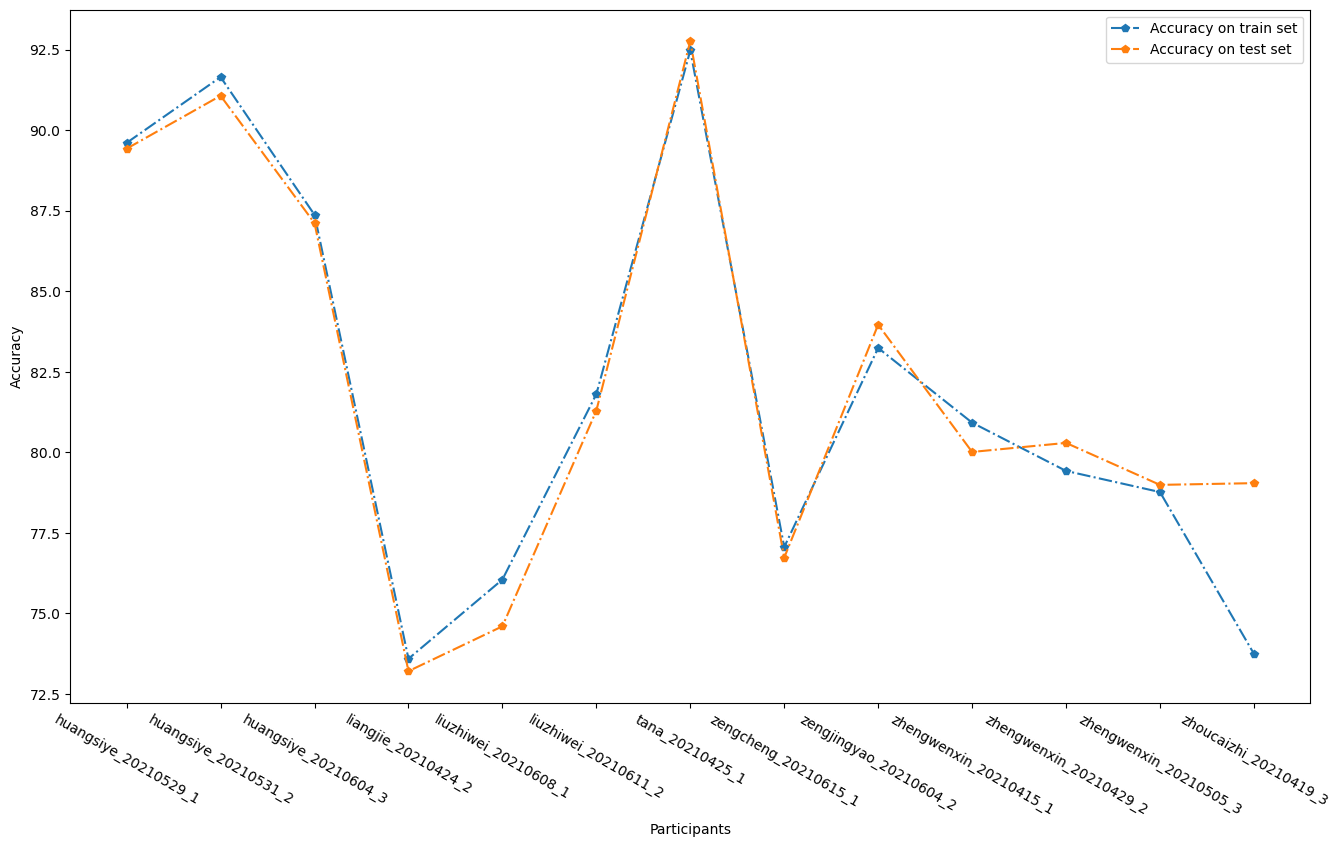

In [35]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_MLP = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = MLP().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_MLP.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [36]:
class CNN(nn.Module):
    def __init__(self, num_classes = 2):
        super(CNN, self).__init__()
        # self.feature_extraction = nn.Sequential(
        #     nn.Conv1d(in_channels = 1, out_channels = 2, kernel_size = 16, padding = 1),
        #     nn.MaxPool1d(kernel_size = 8, stride = 1),
        #     nn.ReLU(),
        #     nn.Conv1d(in_channels = 2, out_channels = 2, kernel_size = 16),
        #     nn.Conv1d(in_channels = 2, out_channels = 4, kernel_size = 16, padding = 1),
        #     nn.ReLU()
        # )  
        # self.classifier = nn.Sequential(
        #     nn.Linear(1048, 2048),
        #     nn.ReLU(),
        #     nn.Dropout(),
        #     nn.Linear(2048, num_classes)
        # )
        self.feature_extraction = nn.Sequential(
            nn.Conv1d(in_channels = 5, out_channels = 8, kernel_size = 4, padding = 1),
            nn.MaxPool1d(kernel_size = 4, stride = 1),
            nn.ReLU(),
            nn.Conv1d(in_channels = 8, out_channels = 16, kernel_size = 4),
            nn.Conv1d(in_channels = 16, out_channels = 32, kernel_size = 4, padding = 1),
            nn.ReLU()
        )  
        self.classifier = nn.Sequential(
            nn.Linear(1728, 2048),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x = self.feature_extraction(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.
Acc of train set: 89.43787
Acc of test set: 90.11373
Begin to process person huangsiye_20210531_2.
Acc of train set: 91.33824
Acc of test set: 91.81380
Begin to process person huangsiye_20210604_3.
Acc of train set: 87.12493
Acc of test set: 87.42302
Begin to process person liangjie_20210424_2.
Acc of train set: 73.47560
Acc of test set: 73.85388
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 76.21220
Acc of test set: 73.99514
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 81.68837
Acc of test set: 81.10823
Begin to process person tana_20210425_1.
Acc of train set: 92.60534
Acc of test set: 92.70315
Begin to process person zengcheng_20210615_1.
Acc of train set: 77.23342
Acc of test set: 76.17703
Begin to process person zengjingyao_20210604_2.
Acc of train set: 84.37643
Acc of test set: 81.22390
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 80.46261
Acc of test set: 81.34129
Begin to pro

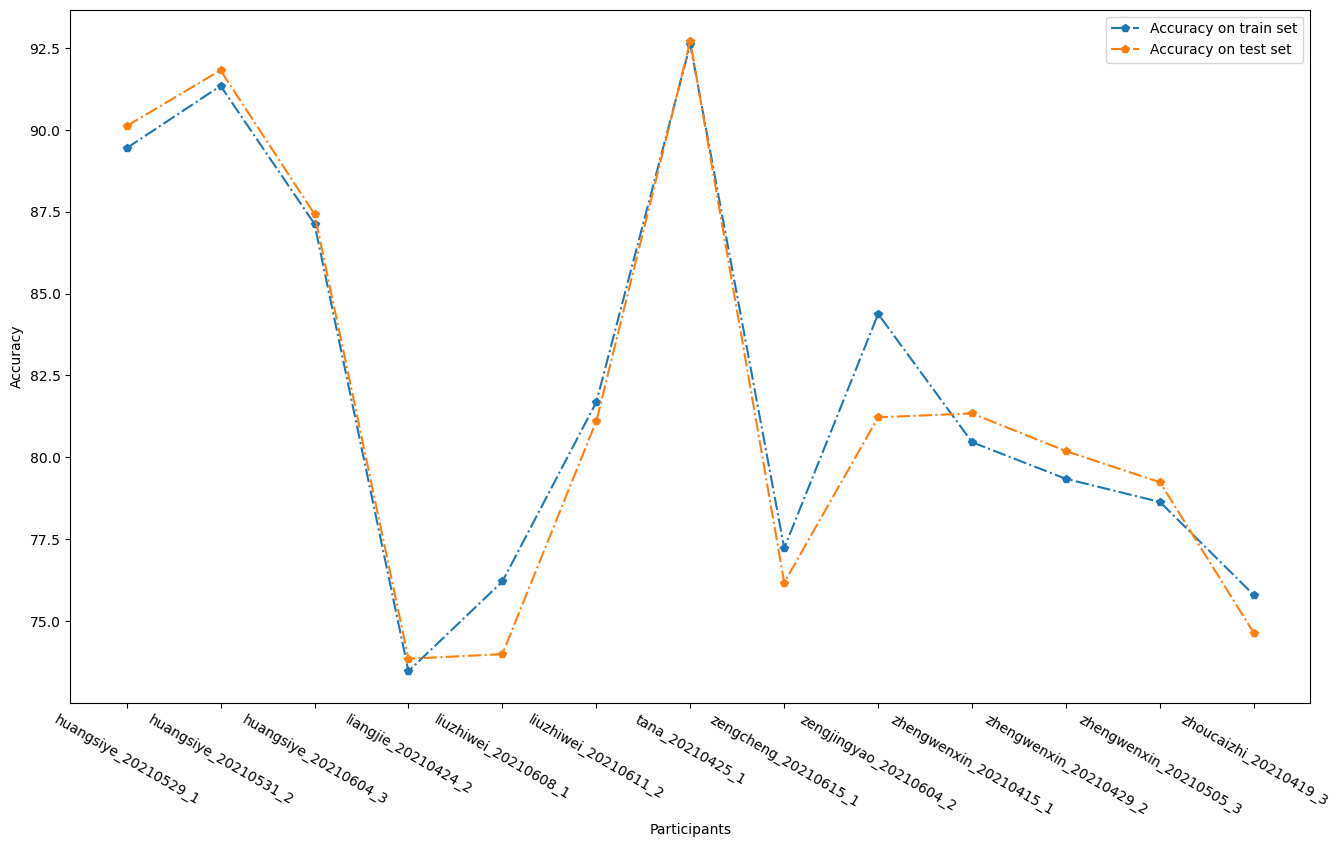

In [37]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_CNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5).permute(0, 2, 1)
        test_data = test_data.reshape(test_data.shape[0], 62, 5).permute(0, 2, 1)
        # train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1).permute(0, 2, 1)
        # test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], 1).permute(0, 2, 1)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = CNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_CNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

In [38]:
class RNN(nn.Module):
    def __init__(self, hidden_size = 32, num_classes = 2):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size = 5, hidden_size = self.hidden_size, num_layers = 2, batch_first = True, bidirectional = True)
        self.classifier = nn.Sequential(
            nn.Linear(62 * self.hidden_size * 2, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x, _ = self.rnn(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.
Acc of train set: 89.19130
Acc of test set: 90.40935
Begin to process person huangsiye_20210531_2.
Acc of train set: 91.53462
Acc of test set: 91.29606
Begin to process person huangsiye_20210604_3.
Acc of train set: 86.89523
Acc of test set: 88.01981
Begin to process person liangjie_20210424_2.
Acc of train set: 73.84363
Acc of test set: 73.11700
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 75.69960
Acc of test set: 74.78111
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 81.56319
Acc of test set: 81.83738
Begin to process person tana_20210425_1.
Acc of train set: 92.69676
Acc of test set: 92.52241
Begin to process person zengcheng_20210615_1.
Acc of train set: 76.73693
Acc of test set: 77.69145
Begin to process person zengjingyao_20210604_2.
Acc of train set: 83.30153
Acc of test set: 84.17392
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 80.89836
Acc of test set: 80.55240
Begin to pro

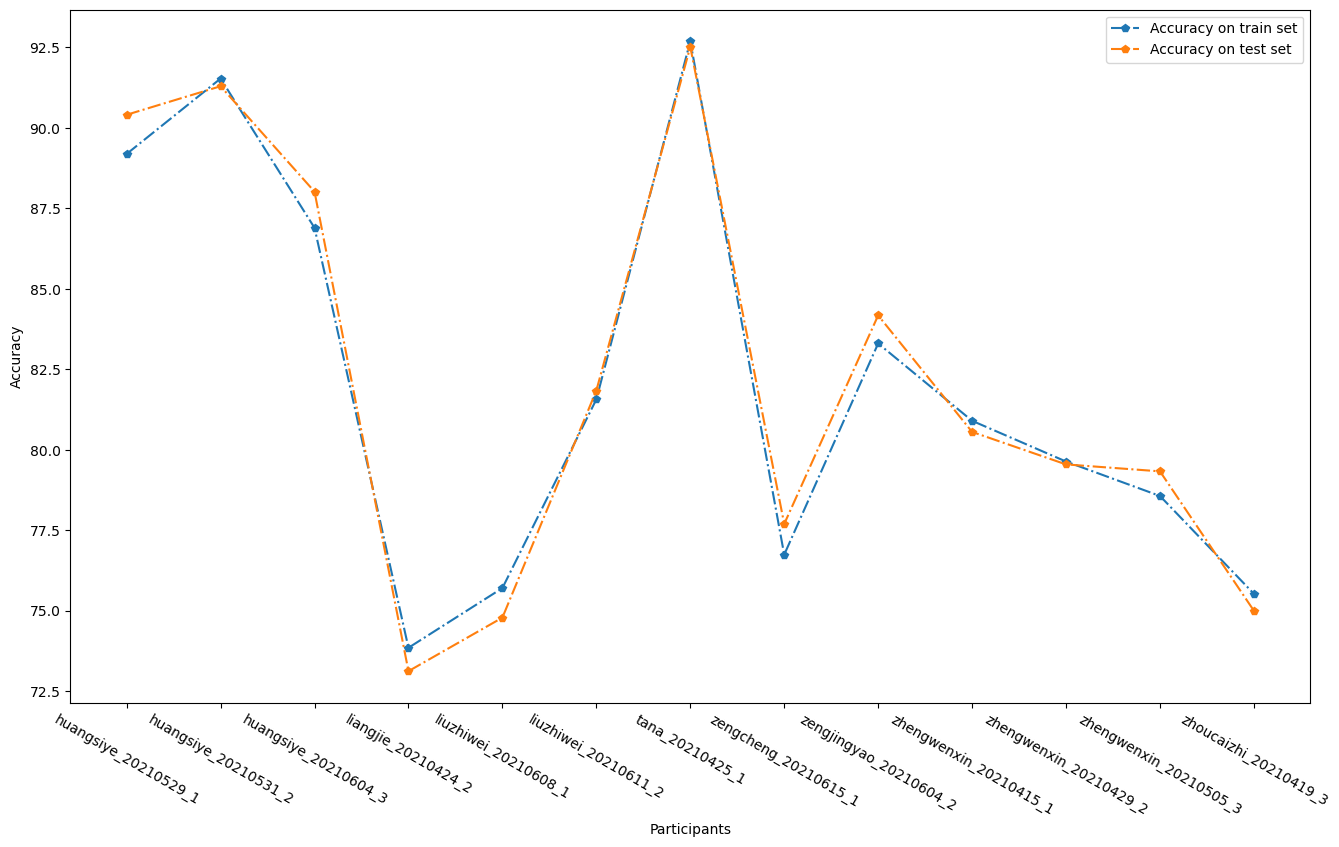

In [39]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_RNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5)
        test_data = test_data.reshape(test_data.shape[0], 62, 5)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = RNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_RNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

8/8 [==============================] - 0s 15ms/step - loss: 0.4941
Epoch 10/15
8/8 [==============================] - 0s 15ms/step - loss: 0.4941
Epoch 11/15
8/8 [==============================] - 0s 16ms/step - loss: 0.4983
Epoch 12/15
8/8 [==============================] - 0s 17ms/step - loss: 0.4971
Epoch 13/15
8/8 [==============================] - 0s 16ms/step - loss: 0.4924
Epoch 14/15
8/8 [==============================] - 0s 17ms/step - loss: 0.4913
Epoch 15/15
8/8 [==============================] - 0s 16ms/step - loss: 0.4965
Acc of test set: 0.74081


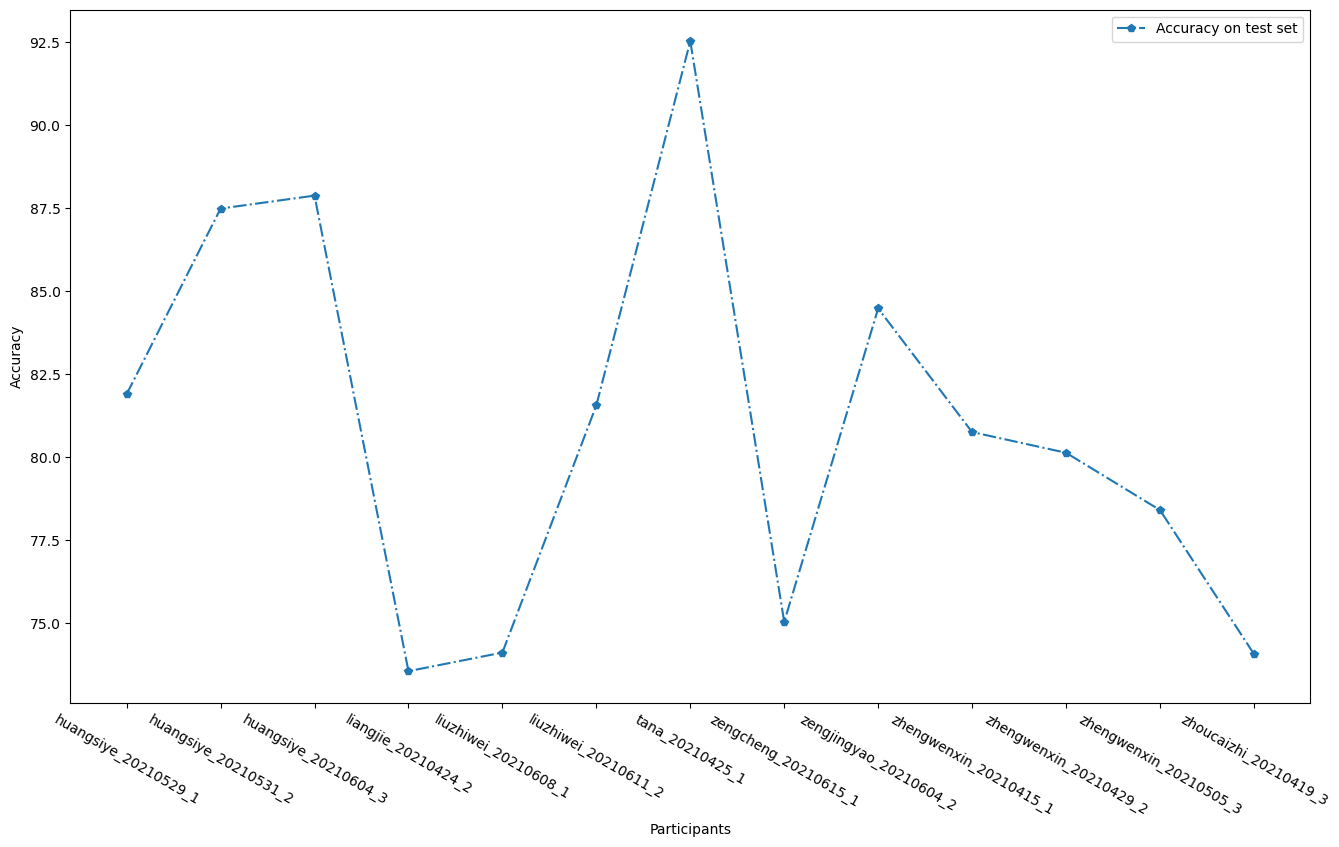

In [45]:
data_list = os.listdir(data_path)
acc_tests_EEGNet = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = tf.convert_to_tensor(traindata[:,:-1]), tf.convert_to_tensor(traindata[:,-1])
        test_data, test_label = tf.convert_to_tensor(testdata[:,:-1]), tf.convert_to_tensor(testdata[:,-1])
        train_data = tf.reshape(train_data, [train_data.shape[0], 62, 5])
        test_data = tf.reshape(test_data, [test_data.shape[0], 62, 5])
        net = EEGModels.EEGNet_SSVEP(nb_classes=2, Chans=62, Samples=5)
        net.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam')
        net.fit(train_data,train_label,batch_size=64,epochs = 15)
        y = net(test_data).numpy()
        y = torch.Tensor(y)
        _, predicted = torch.max(y, 1)
        predicted = predicted.numpy()
        tests.append((predicted==test_label.numpy()).sum().item()/test_label.shape[0])
    acc_test = np.mean(tests)
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_EEGNet.append(acc_test*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_tests_EEGNet, '-.p')
plt.legend(['Accuracy on test set'])
plt.show()

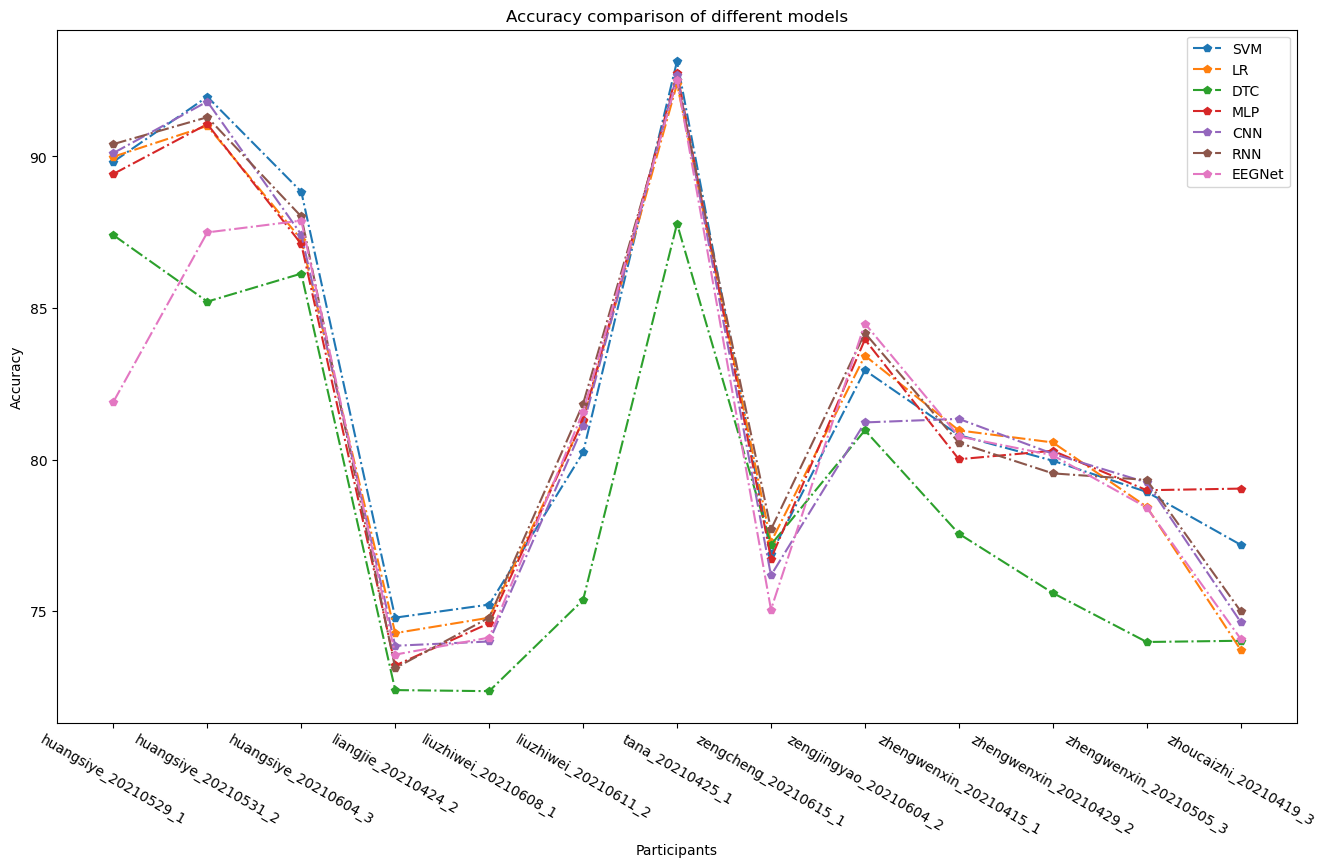

In [46]:
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
plt.title("Accuracy comparison of different models")
x = os.listdir(data_path)
plt.plot(x, acc_tests_SVM, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.plot(x, acc_tests_EEGNet, '-.p')
plt.legend(['SVM','LR','DTC','MLP','CNN','RNN','EEGNet'])
plt.show()

[82.36219051714298, 81.95209745416236, 78.91825049464939, 82.1897165970102, 81.8325252507749, 82.17420320024536, 80.92342628388185]
[6.180788833098073, 6.213226456913636, 5.60938974198748, 5.99990013760461, 6.427156438981104, 6.339101860908437, 5.746216911957358]


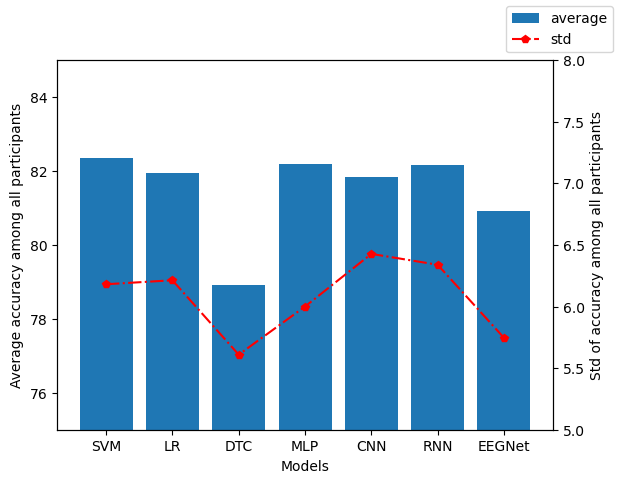

In [48]:
average = [np.mean(acc_tests_SVM), np.mean(acc_tests_LR), np.mean(acc_tests_DTC), 
           np.mean(acc_tests_MLP), np.mean(acc_tests_CNN), np.mean(acc_tests_RNN), np.mean(acc_tests_EEGNet)]
std = [np.std(acc_tests_SVM), np.std(acc_tests_LR), np.std(acc_tests_DTC), 
       np.std(acc_tests_MLP), np.std(acc_tests_CNN), np.std(acc_tests_RNN), np.std(acc_tests_EEGNet)]
models = ['SVM','LR','DTC','MLP','CNN','RNN','EEGNet']
print(average)
print(std)
fig, ax1 = plt.subplots()
ax1.bar(models, average)
ax1.set_xlabel('Models')
ax1.set_ylabel('Average accuracy among all participants')
ax1.set_ybound(75, 85)
ax2 = ax1.twinx()
ax2.plot(models, std, '-.p', color = 'red')
ax2.set_ylabel('Std of accuracy among all participants')
ax2.set_ybound(5.0, 8.0)
fig.legend(['average', 'std'])
fig.show()